## Get network stats

In [2]:
import pickle
import pandas as pd
import networkx as nx
import pickle
import numpy as np
import powerlaw
import matplotlib.pyplot as plt

In [3]:
def graph_stats(G):
    """Returns various statistics of a given graph G."""
    stats = {}
    stats['num_nodes'] = G.number_of_nodes()
    stats['num_edges'] = G.number_of_edges()
    stats['density'] = nx.density(G)
    
    degrees = [d for n, d in G.degree()]
    stats['mean_degree'] = np.mean(degrees)
    stats['std_degree'] = np.std(degrees)
    
    if nx.is_connected(G):
        stats['diameter'] = nx.diameter(G)
    else:
        stats['diameter'] = None  # Graph is not connected
    
    stats['degree_assortativity'] = nx.degree_assortativity_coefficient(G)
    
    # Giant Connected Component (GCC)
    largest_cc = max(nx.connected_components(G), key=len)
    GCC = G.subgraph(largest_cc)
    stats['GCC_size'] = len(GCC)
    
    # Power-law fitting
    try:
        fit = powerlaw.Fit(degrees)
        stats['power_law_alpha'] = fit.alpha  # Power-law exponent
        stats['power_law_xmin'] = fit.xmin  # Minimum value where power law applies
        stats['ks_test_statistic'] = fit.D  # KS test statistic (lower is better)
        
        # Compare power law with other distributions
        distribution_list = ['lognormal', 'exponential', 'truncated_power_law']
        comparison_results = {}
        
        for dist in distribution_list:
            R, p = fit.distribution_compare('power_law', dist)
            comparison_results[dist] = (R, p)
        
        # Find the best alternative distribution (lowest R and p-value)
        best_fit = min(comparison_results.items(), key=lambda x: (x[1][0], x[1][1]))
        best_dist, (best_R, best_p) = best_fit
        
        stats['best_powerlaw_comparison'] = f"power law vs {best_dist}: R = {best_R:.3f}, p = {best_p:.3f}"
    
    except Exception as e:
        stats['power_law_test_error'] = str(e)
    
    return stats

# Users' liked videos hashtag network

Each user in the likes data has their own network of hashtags coocurring in videos they liked. All 22 networks are aggregated, so that the edge weights are summed up.

In [43]:
with open("likes_g_aggregated.pkl", "rb") as f:
    likes_agg = pickle.load(f)

In [44]:
likes_agg_statistics = graph_stats(likes_agg)

Calculating best minimal value for power law fit


Assuming nested distributions


In [45]:
for key, val in likes_agg_statistics.items():
    print(key,'-', val)

num_nodes - 475
num_edges - 4617
density - 0.0410126582278481
mean_degree - 19.44
std_degree - 13.167507057346246
diameter - None
degree_assortativity - 0.28649855388067774
GCC_size - 359
power_law_alpha - 3.0386850482923404
power_law_xmin - 14.0
ks_test_statistic - 0.11574775442641533
best_powerlaw_comparison - power law vs truncated_power_law: R = -8.673, p = 0.000


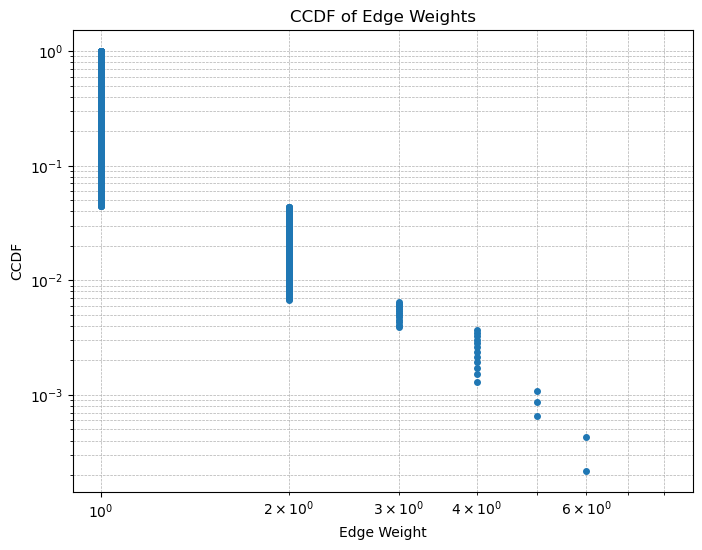

In [ ]:
# Assuming likes_agg is a NetworkX graph
weights = [d['weight'] for _, _, d in likes_agg.edges(data=True)]

# Sort weights in ascending order
weights_sorted = np.sort(weights)

# Compute CCDF
ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')  # Log scale for better visualization (optional)
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## Hashtag coocurence

In [4]:
with open('../shared-folder-gald/data/unipartite_og.pkl', 'rb') as f:
    HC = pickle.load(f)

In [5]:
HC_stats = graph_stats(HC)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Assuming nested distributions


In [7]:
for key, val in HC_stats.items():
    print(key,'-', val)

num_nodes - 673697
num_edges - 35570526
density - 0.00015674427983923908
mean_degree - 105.597994350576
std_degree - 713.0254975203421
diameter - None
degree_assortativity - -0.05238549368106408
GCC_size - 671514
power_law_alpha - 2.140394228821985
power_law_xmin - 154.0
ks_test_statistic - 0.007946039245517178
best_powerlaw_comparison - power law vs truncated_power_law: R = -134.901, p = 0.000


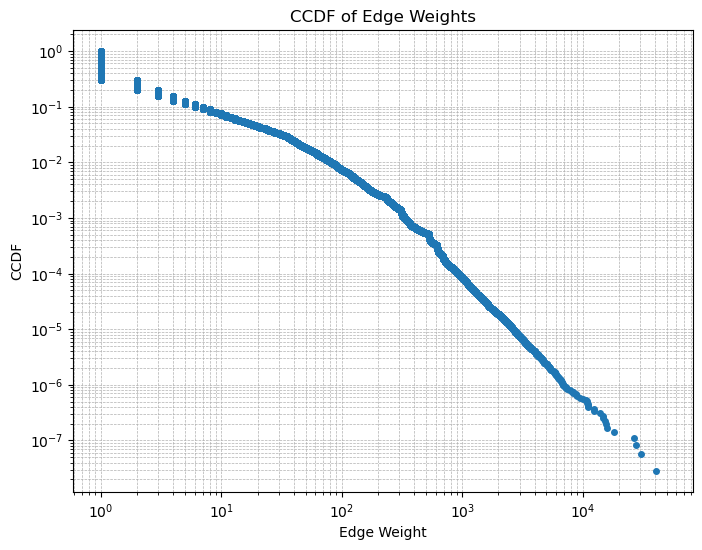

In [8]:
# Assuming likes_agg is a NetworkX graph
weights = [d['weight'] for _, _, d in HC.edges(data=True)]

# Sort weights in ascending order
weights_sorted = np.sort(weights)

# Compute CCDF
ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')  # Log scale for better visualization (optional)
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
